In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import gym
import neat
from evaluator import Evaluator
from datetime import datetime
from tf_neat.recurrent_net import RecurrentNet

param = {
    "g_s":3,
    "s_s":2,
    "max_state":5,
    "react_depth":1,
    "neuron_num":5,
    "input_num":4,
    "output_num":1
}

s = datetime.now().strftime('%Y-%m-%d-%Hh-%Mm-%Ss')
rootPath = f"generations\{s}"

if not os.path.exists(rootPath):
    os.makedirs(rootPath)
    
pop=""

def make_env():
    return gym.make("CartPole-v0")


def make_net(genome, config, bs):
    return RecurrentNet.create(genome, config, bs)

def run(n_generations):
    global pop
    config_path = os.path.join(os.path.dirname(os.path.abspath('')), "lab/neat.cfg")
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path,
    )

    evaluator = Evaluator(
        make_net, make_env=make_env, param=param
    )

    def eval_genomes(genomes, config):
        for idx, genome in genomes:
            print(genome)
            genome.fitness = evaluator.eval_genome(genome, config, idx, rootPath = rootPath)

    pop = neat.Population(config)
    pop.run(eval_genomes, n_generations)

run(10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


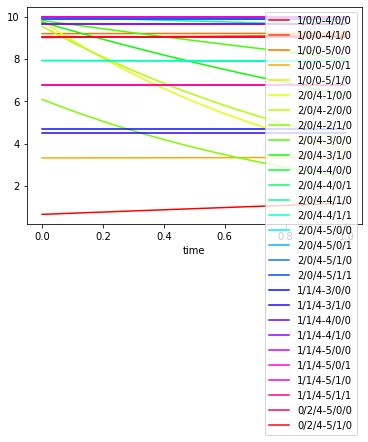

In [135]:
%load_ext autoreload
%autoreload 2
import os
import neat
import pickle
import numpy as np
from gene import Gene
from simulator import Simulator
from tf_neat.recurrent_net import RecurrentNet
np.set_printoptions(precision=10, suppress=True)

def make_net(genome, config, bs):
    return RecurrentNet.create(genome, config, bs)

param = {
    "g_c": 2,
    "g_s": 3,
    "max_state": 5,
    "react_depth": 2,
    "neuron_num": 6,
    "input_num": 4,
    "output_num": 1
}

config_path = os.path.join(os.path.dirname(os.path.abspath('')), "lab/neat.cfg")
config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

filepath = f"test_case"
case_num = 9
genome = ""
with open(f"{filepath}\\{case_num}\\genome.JSON", 'rb') as fr:
    genome = pickle.load(fr)

net = make_net(genome, config, 1)
gene = Gene(net, param)
gene.expression()
model = gene.model
simulator = Simulator(model, engine = "bio", ode_language='FORTRAN') # FORTRAN, PYTHON
simulator.run(1)
simulator.visualize()

In [118]:
simulator.system.a

array([[-11.3443250572],
       [-12.333948388 ],
       [ -8.2466965608],
       [ -9.7717190056],
       [-12.3398186116],
       [ -9.7790058393],
       [-12.3431882366],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],
       [ -7.394829814 ],


In [49]:
gene.V

{'0/0/0': 1.4693150772024737,
 '0/0/1': 1.239355482801582,
 '0/1/0': 0.6417558297584608,
 '0/1/1': 0.6142862503382716,
 '1/0/0': 0.5156937379698163,
 '1/0/1': 0.5543227739236397,
 '1/1/0': 0.5033336053579379,
 '1/1/1': 0.5026061630418811,
 '2/0/0': 0.5003227678387656,
 '2/0/1': 0.5004745091475884,
 '2/1/0': 0.500027641656917,
 '2/1/1': 0.5000215942054879,
 '3/0/0': 0.5000026683389824,
 '3/0/1': 0.5000020912338371,
 '3/1/0': 0.5000001217667781,
 '3/1/1': 0.5000000951260268,
 '4/0/0': 0.5000000117542506,
 '4/0/1': 0.5000000091827017,
 '4/1/0': 0.5000000005346823,
 '4/1/1': 0.5000000004177019,
 '5/0/0': 0.5000000000516134,
 '5/0/1': 0.5000000000403211,
 '5/1/0': 0.5000000000023478,
 '5/1/1': 0.5000000000018341}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Success. 0:00:00.249003 taken for simulating


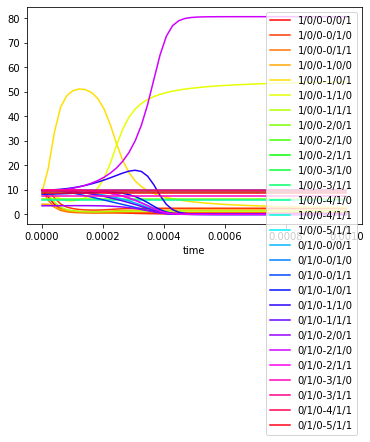

In [86]:
%load_ext autoreload
%autoreload 2
import os
import neat
import pickle
import numpy as np
from gene import Gene
from simulator import Simulator
from tf_neat.recurrent_net import RecurrentNet
np.set_printoptions(precision=10, suppress=True)

def make_net(genome, config, bs):
    return RecurrentNet.create(genome, config, bs)

param = {
    "g_c": 2,
    "g_s": 3,
    "max_state": 5,
    "react_depth": 2,
    "neuron_num": 6,
    "input_num": 4,
    "output_num": 1
}

config_path = os.path.join(os.path.dirname(os.path.abspath('')), "lab/neat.cfg")
config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

filepath = f"test_case"
case_num = 7
genome = ""
with open(f"{filepath}\\{case_num}\\genome.JSON", 'rb') as fr:
    genome = pickle.load(fr)

net = make_net(genome, config, 1)
gene = Gene(net, param)
gene.expression()
model = gene.model
simulator = Simulator(model, engine = "phy", ode_language='FORTRAN') # FORTRAN, PYTHON
simulator.run(0.001)
simulator.visualize()

In [ ]:
modeld = gene.model
np.take(simulator.system.x_0,[1])

In [ ]:
modeld = gene.model
modeld["M_"]

In [ ]:
simulator.system.diff1

In [ ]:
simulator.system.diff2

In [ ]:
np.exp(-modeld["a"])

In [ ]:
M_ = modeld["M_"].to_numpy()

In [ ]:
 def relu(x) :
    return np.maximum(0,x)
relu(M_[:,:4]).argmax(axis=0)

In [ ]:
np.where(relu(M_[:,:4])>0,1,0)

In [ ]:
np.where(relu(M_[:,:4])>0,modeld["x_0"],0)

In [ ]:
M_r = relu(M_[:,:4])

In [ ]:
M_r.shape

In [ ]:
reactant = np.zeros(M_r.shape)
reactant[np.arange(M_r.shape[1]), np.argmax(M_r, axis=0)] =1

In [ ]:
reactant.argmax(axis=0)

In [ ]:
np.apply_along_axis(lambda x: x[reactant.argmax(axis=0)], 0, modeld["x_0"])

In [ ]:
M_r

In [ ]:
(M_r - reactant).argmax( axis=0)

In [ ]:
np.arange(M_r.shape[0])

In [ ]:
re = np.ones(4)

In [ ]:
np.apply_along_axis(lambda x: x, 1, relu(M_[:,:4]))

In [ ]:
relu(M_[:,:4])

In [ ]:
modeld["x_0"]

In [ ]:
np.exp(modeld["a"])

In [ ]:
simulator = Simulator.by_file(filepath)
simulator.model_dict["M_"]

In [ ]:
simulator.model_dict["S"]

In [ ]:
simulator.model["S"]

In [ ]:
#simulator = Simulator.by_file(filepath)
simulator.run(0.1)
simulator.visualize()

In [ ]:
simulator.model

In [ ]:
import numpy as np
from simulator import Simulator
np.set_printoptions(precision=6, suppress=True)
time = "2022-04-28-08h-34m-27s"
gen_idx =1
idx = 74
filepath = f"generations\\{time}\\gen_{gen_idx}\\{idx}"

simulator = Simulator.by_file(filepath)


#simulator.run(0.1)
#simulator.visualize(savePath=savePath)


In [ ]:
simulator.run(0.7)

In [ ]:
## np.dot(self.x.T, self.V) +\
## np.dot(self.q, np.dot(1 / (self.D + 1) - 1, self.q.T))

q = np.dot(np.diag(np.dot(simulator.model['M'], simulator.model['q_c']).T[0]), simulator.model['S'])
V = np.dot(q, np.dot(1/(simulator.model['D']+1)-1 ,q.T))

np.dot(q.T, simulator.model['M_'])[0].shape

#np.dot(simulator.model['M'].T, simulator.model['M_'])


In [ ]:
simulator.model["x"]

In [ ]:
simulator.system.M_[7]

In [ ]:
np.exp(np.dot(np.abs(simulator.system.M_).T, np.log(simulator.system.x)))

In [ ]:
simulator.model_dict["M_"]

In [ ]:
simulator.run(0.001)

In [ ]:
simulator.run(0.62)

In [ ]:
simulator.model

In [ ]:
print(simulator.model['M'].shape)
print(simulator.model['q_c'].shape)
print(simulator.model['S'].shape)
print(q.shape)

In [ ]:
type(simulator.model_dict['M_'])

In [ ]:
np.dot(q.T, simulator.model['M_'])[:,0]

In [ ]:
q.shape

In [ ]:
2.71**813.911757

In [ ]:
simulator.history["xp"][:1]

In [ ]:
from system import System
system = System(simulator.model)

In [ ]:
system.energy()

In [ ]:
np.set_printoptions(precision=6, suppress=True)
system.flow()